### Business Intelligence Solution for 2019 Sales Analysis

##### CRISP-DM Outline:

1. Business Understanding:
 Objective:
Analyze the client’s transactional data from 2019 to identify opportunities to drive more sales and improve operational efficiency.

Key Business Questions:
1. How much revenue was generated in 2019?
2. Are there any seasonal trends in the sales data?
3. Which products performed the best and worst?
4. How do sales in different months and weeks compare?
5. Which cities received the most product deliveries?
6. How do different product categories perform in terms of revenue and quantity sold?
7. Identify additional insights to inform business strategies.

Constraints:
Products priced above $99.99 are categorized as "High-Level," while others are "Basic-Level."

2. Data Understanding:
Data Sources:
Excel Files: Sales data from January to June 2019 stored in CSV format.
Database: Sales data from July to December 2019 stored in a remote SQL database.
Data Collection:
Import CSV files for the first 6 months.
Connect to the remote database and extract data for the last 6 months.
Initial Data Exploration:
Check for missing data, inconsistencies, and data types.
Get an overview of sales trends, product lists, pricing, and delivery locations.

3. Data Preparation:
Data Cleaning:
Handle missing values and correct data inconsistencies.
Standardize formats across CSV and database data.
Data Integration:
Combine data from both sources into a unified dataset for the entire year.
Feature Engineering:
Create new features such as product level ("High-Level" or "Basic-Level") based on unit price.
Generate time-based features (e.g., month, week) to analyze trends.
Label and categorize products by their revenue contribution and quantity sold.

4. Modeling:
Sales Analysis:
Calculate total revenue, monthly, and weekly sales comparisons.
Identify seasonality in sales using time-series analysis.
Rank products by sales performance (best-selling vs. worst-selling).
Compare sales across cities and product categories.
Product Categorization:
Apply conditions to label products as "High-Level" or "Basic-Level."
Visualization:
Use visual tools to illustrate trends, seasonality, and comparisons (e.g., bar charts, line graphs, heat maps).

5. Evaluation:
Validation:
Ensure all business questions are addressed with the analysis.
Validate the consistency and accuracy of the data.
Business Insight:
Summarize key findings, such as peak sales periods, top-performing products, and geographic hotspots.
Provide recommendations for increasing sales and improving operational efficiency based on insights.

6. Deployment:
Report Generation:
Create a comprehensive report that answers all key business questions.
Include visualizations and key metrics to support decision-making.
Presentation:
Present the findings to the client, highlighting actionable insights.
BI Solution:
Recommend setting up a dashboard for real-time sales monitoring.
Suggest future data collection improvements for better analysis.
This outline provides a structured approach to solving the client's business problem using the CRISP-DM methodology, ensuring a thorough and systematic analysis of their 2019 sales data.









Overview
This project provides a comprehensive business intelligence solution using Power BI to analyze and visualize a client’s 2019 sales data. The goal is to deliver actionable insights into total revenue, seasonal trends, product performance, city-wise deliveries, and category comparisons, enhancing sales and operational efficiency.

Key Features
- Total Revenue Analysis: Understand the total revenue generated throughout the year.
- Seasonality Trends: Identify seasonal sales patterns and trends.
- Product Performance: Analyze the best and worst-selling products.
- Sales Comparisons: Compare sales data across different months and weeks.
- City-wise Deliveries: Determine which cities received the most deliveries.
- Category Comparisons: Evaluate revenue and quantities for different product categories.
- Product Categorization: Classify products as high-level or basic-level based on unit price.

Methodology: CRISP-DM

  The project follows the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, structured as follows:

- Business Understanding: Define objectives and requirements from the client to drive sales and improve efficiency.
- Data Understanding: Collect and explore the dataset, which includes sales data for 2019 across various months and cities.
- Data Preparation: Clean and transform the data, integrating sources from CSV files and a remote database.
- Modeling: Apply appropriate data analysis techniques to uncover insights.
- Evaluation: Assess the results against business objectives to ensure they meet the client’s needs.
- Deployment: Develop and deploy a Power BI dashboard to visualize the insights.
- Installation
- Clone the repository:
bash
Copy code
git clone https://github.com/yourusername/comprehensive-power-bi-dashboard.git
Navigate to the project directory:
bash
Copy code
cd comprehensive-power-bi-dashboard
Open the Power BI project file (.pbix) using Power BI Desktop.
Usage
Open the Power BI file in Power BI Desktop.
Explore various dashboard pages, including Total Revenue, Seasonal Trends, Product Performance, City-wise Deliveries, and Category Comparisons.
Use interactive filters and visuals to derive insights from the data.
Contributing

In [469]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import folium
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.subplots import go
from matplotlib.ticker import FuncFormatter

# Statistical tests
from scipy.stats import f_oneway, shapiro, levene

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

# Database connectivity
import pyodbc
from sqlalchemy import create_engine

# Managing environment variables
from dotenv import dotenv_values

# Handling HTTP requests
import requests

# Handling file paths and directories
import os
from pathlib import Path

# Geocoding
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# Suppressing warnings
import warnings 

warnings.filterwarnings('ignore')

#### Load Dataset

##### Loading Data from January to June 2019.
##### Loading Data to Python VS code environment

In [470]:
# Accessing the second data set, downlaoded from onedrive into data folder. 

data_jan = pd.read_csv('../data/Sales_January_2019.csv')

data_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [471]:
data_feb = pd.read_csv('../data/Sales_February_2019.csv')

data_feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [472]:
data_mar = pd.read_csv('../data/Sales_March_2019.csv')

data_mar.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [473]:
data_apr = pd.read_csv('../data/Sales_April_2019.csv')

data_apr.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [474]:
data_may = pd.read_csv('../data/Sales_May_2019.csv')

data_may.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [475]:
data_jun = pd.read_csv('../data/Sales_June_2019.csv')

data_jun.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [476]:
# Merging January 2019 to June 2019 Data

# List of all the DataFrames to concatenate
data_frames = [data_jan, data_feb, data_mar, data_apr, data_may, data_jun]

# Concatenate all DataFrames into one
data1 = pd.concat(data_frames, ignore_index=True)
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### 3.  EDA

- 1. Data Quality Assessment & Exploring data (info, duplicated, null values, describe)

In [477]:
print(data1.info())  # Check data structure and types
print(data1.head())  # Preview the first few rows of the concatenated data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB
None
  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19

In [478]:
# Create DataFrame
data1 = pd.DataFrame(data1)

# Convert 'Order Date' to datetime and handle errors
data1['Order Date'] = pd.to_datetime(data1['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Check for any NaT values (invalid dates)
if data1['Order Date'].isna().any():
    print("There are invalid dates in the 'Order Date' column.")

# Format the 'Order Date' to the desired format
data1['Order Date'] = data1['Order Date'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')

# Display the DataFrame
data1

There are invalid dates in the 'Order Date' column.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00.000000,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00.000000,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00.000000,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00.000000,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00.000000,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00.000000,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00.000000,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00.000000,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00.000000,"916 Main St, San Francisco, CA 94016"


In [479]:
# Identify rows with NaT values
invalid_dates = data1[data1['Order Date'].isna()]

# Display rows with invalid dates
print("Rows with invalid dates:")
invalid_dates


Rows with invalid dates:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1073,Order ID,Product,Quantity Ordered,Price Each,NaN,Purchase Address
...,...,...,...,...,...,...
84643,NaN,NaN,NaN,NaN,NaN,NaN
84662,NaN,NaN,NaN,NaN,NaN,NaN
84735,NaN,NaN,NaN,NaN,NaN,NaN
85307,Order ID,Product,Quantity Ordered,Price Each,NaN,Purchase Address


In [480]:
# Columns Headers data1

print(data1.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [481]:
# Change Columns spacing with hyphen-

# Display original column names
print("Original column names:")
print(data1.columns)

# Rename columns to replace spaces with hyphens
data1.columns = [col.replace(' ', '_') for col in data1.columns]

# Display updated column names
print("\nUpdated column names:")
print(data1.columns)
data1

Original column names:
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Updated column names:
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00.000000,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00.000000,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00.000000,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00.000000,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00.000000,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00.000000,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00.000000,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00.000000,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00.000000,"916 Main St, San Francisco, CA 94016"


##### Loading Data July to December 2019

In [482]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [483]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [484]:
# This will connect to the server and might take a few seconds to be complete. 
connection = pyodbc.connect(connection_string)

In [485]:
query = "SELECT * FROM dbo.Sales_July_2019"

data_jul = pd.read_sql(query, connection)
data_jul.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [486]:
query = "SELECT * FROM dbo.Sales_August_2019"

data_aug = pd.read_sql(query, connection)
data_aug.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [487]:
query = "SELECT * FROM dbo.Sales_September_2019"

data_sep = pd.read_sql(query, connection)
data_sep.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [488]:
query = "SELECT * FROM dbo.Sales_October_2019"

data_oct = pd.read_sql(query, connection)
data_oct.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [489]:
query = "SELECT * FROM dbo.Sales_November_2019"

data_nov = pd.read_sql(query, connection)
data_nov.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [490]:
query = "SELECT * FROM dbo.Sales_December_2019"

data_dec = pd.read_sql(query, connection)
data_dec.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


In [491]:
# List of all the DataFrames to concatenate
data_frames = [data_jul, data_aug, data_sep, data_oct, data_nov, data_dec]

# Concatenate all DataFrames into one
data2 = pd.concat(data_frames, ignore_index=True)
data2

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [492]:
print(data2.info())  # Check data structure and types
print(data2.head())  # Preview the first few rows of the concatenated data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB
None
   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

                    Or

In [493]:
# Identify rows with NaT values
invalid_date = data2[data2['Order_Date'].isna()]

# Display rows with invalid dates
print("Rows with invalid dates:")
invalid_date


Rows with invalid dates:


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
199,NaN,None,NaN,NaN,None,None
315,NaN,None,NaN,NaN,None,None
599,NaN,None,NaN,NaN,None,None
675,NaN,None,NaN,NaN,None,None
775,NaN,Product,NaN,NaN,None,Purchase Address
...,...,...,...,...,...,...
99856,NaN,Product,NaN,NaN,None,Purchase Address
100104,NaN,None,NaN,NaN,None,None
100300,NaN,Product,NaN,NaN,None,Purchase Address
100330,NaN,Product,NaN,NaN,None,Purchase Address


In [494]:
print(data1.columns)
print(data2.columns)


Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')


In [495]:
# Concatenating data1 and data2, Ensuring Both DataFrames Have the Same Columns

# Concatenate the DataFrames
df = pd.concat([data1, data2], ignore_index=True)

# Display the concatenated DataFrame
print("Concatenated DataFrame:")

df

Concatenated DataFrame:


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00.000000,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00.000000,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00.000000,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00.000000,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00.000000,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [496]:
# Export Df to csv file




#### 3. EDA 

- 2. Data Quality Assessment & Exploring data (info, duplicated, null values, describe)


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        185950 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [498]:
# Using pandas' unique() function
unique_values = df['Order_ID'].unique()
print(unique_values)

['141234' '141235' '141236' ... 319668.0 319669.0 319670.0]


In [499]:

# Step 1: Convert the 'Order_ID' column to numeric, setting errors='coerce' to convert strings to NaN
df['Order_ID'] = pd.to_numeric(df['Order_ID'], errors='coerce')

# Step 2: Drop NaN values (which were originally strings)
df = df.dropna(subset=['Order_ID'])

# Step 3: Convert the remaining numeric values to integers
df['Order_ID'] = df['Order_ID'].astype(int)

# Step 4: Use the unique() function if needed
unique_values = df['Order_ID'].unique()
print(unique_values)

[141234 141235 141236 ... 319668 319669 319670]


In [500]:
# Using pandas' unique() function
unique_values = df['Product'].unique()
print(unique_values)

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']


In [501]:
# Using pandas' unique() function
unique_values = df['Quantity_Ordered'].unique()
print(unique_values)

['1' '2' '3' '5' '4' '7' '6' '9' 1.0 5.0 2.0 3.0 4.0 6.0 7.0 8.0 9.0]


In [502]:

# Step 1: Convert 'Quantity_Ordered' to numeric, coercing non-numeric values to NaN
df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], errors='coerce')

# Step 2: Drop NaN values that result from invalid conversions
df = df.dropna(subset=['Quantity_Ordered'])

# Step 3: Convert the column to integers
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int)

# Step 4: Get the unique values
unique_values = df['Quantity_Ordered'].unique()

# Step 5: Print the unique integer values
print(unique_values)

[1 2 3 5 4 7 6 9 8]


In [503]:
# Using pandas' unique() function
unique_values = df['Price_Each'].unique()
print(unique_values)


['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0'
 '700.0' '150.0' '300.0' '1700.0' 150.0 300.0 3.8399999141693115
 2.990000009536743 99.98999786376953 600.0 11.949999809265137
 14.949999809265137 379.989990234375 11.989999771118164 400.0
 149.99000549316406 109.98999786376953 999.989990234375 389.989990234375
 1700.0 700.0]


In [504]:
# Clean the 'Price_Each' column
df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce')  # Convert to numeric, forcing errors to NaN

# Drop NaN values
df_cleaned = df.dropna(subset=['Price_Each'])

# Round to 2 decimal places
df_cleaned['Price_Each'] = df_cleaned['Price_Each'].round(2)

# Check the unique values after cleaning
unique_values_cleaned = df_cleaned['Price_Each'].unique()
print(unique_values_cleaned)

[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99]


In [505]:
# Round values in the 'Price_Each' column to 2 decimal places
df['Price_Each'] = df['Price_Each'].round(2)

# Verify the result
print(df['Price_Each'].head())

0    700.00
1     14.95
2     11.99
3    149.99
4     11.99
Name: Price_Each, dtype: float64


In [506]:
# Using pandas' unique() function
unique_values = df['Order_Date'].unique()
print(unique_values)

['2019-01-22 21:25:00.000000' '2019-01-28 14:15:00.000000'
 '2019-01-17 13:33:00.000000' ... '2001-12-19 12:01:00.0000000'
 '2009-12-19 06:43:00.0000000' '2003-12-19 10:39:00.0000000']


In [507]:
df['Order_Date'].value_counts()

Order_Date
2015-12-19 20:16:00.0000000    8
2011-12-19 13:24:00.0000000    7
2030-10-19 21:28:00.0000000    7
2019-04-02 13:24:00.000000     7
2015-09-19 23:41:00.0000000    6
                              ..
2019-05-08 15:57:00.000000     1
2019-05-13 15:35:00.000000     1
2019-05-23 23:16:00.000000     1
2019-05-11 12:07:00.000000     1
2003-12-19 10:39:00.0000000    1
Name: count, Length: 142395, dtype: int64

In [508]:
# Convert 'Order_Date' to datetime if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Function to replace year with 2019, keeping month, day, and time the same
def replace_year(date):
    if date.year != 2019:
        return date.replace(year=2019)
    else:
        return date

# Apply the function to the 'Order_Date' column
df['Order_Date'] = df['Order_Date'].apply(replace_year)

# Verify the result
print(df['Order_Date'].head())


0   2019-01-22 21:25:00
1   2019-01-28 14:15:00
2   2019-01-17 13:33:00
3   2019-01-05 20:33:00
4   2019-01-25 11:59:00
Name: Order_Date, dtype: datetime64[ns]


In [509]:
df['Order_Date'].value_counts()

Order_Date
2019-12-19 18:56:00    44
2019-12-19 19:25:00    44
2019-12-19 19:01:00    43
2019-12-19 19:16:00    42
2019-12-19 19:46:00    42
                       ..
2019-03-12 02:15:00     1
2019-03-25 07:21:00     1
2019-03-17 20:35:00     1
2019-03-31 17:03:00     1
2019-12-19 03:15:00     1
Name: count, Length: 74739, dtype: int64

In [510]:
# Using pandas' unique() function
unique_values = df['Purchase_Address'].unique()
print(unique_values)

['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ...
 '273 Wilson St, Seattle, WA 98101' '778 River St, Dallas, TX 75001'
 '747 Chestnut St, Los Angeles, CA 90001']


In [511]:
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int32         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [513]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64


In [514]:
# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  # Blank line for better readability

Unique values in column 'Order_ID':
[141234 141235 141236 ... 319668 319669 319670]

Unique values in column 'Product':
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']

Unique values in column 'Quantity_Ordered':
[1 2 3 5 4 7 6 9 8]

Unique values in column 'Price_Each':
[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99]

Unique values in column 'Order_Date':
<DatetimeArray>
['2019-01-22 21:25:00', '2019-01-28 14:15:00', '2019-01-17 13:33:00',
 '2019-01-05 20:33:00', '2019-01-25 11:59:00', '2019-01-29 20:22:00',
 '2019-01-26 12:16:00', '2019-01-05 12:04:00', '2

In [515]:
# Check for duplicated Order_IDs (shows True for duplicates)
duplicated_ids = df['Order_ID'].duplicated()
duplicated_ids


0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order_ID, Length: 185950, dtype: bool

In [516]:
# Display duplicated Order_ID rows
print("Duplicated Order_ID rows:")
print(df[duplicated_ids])

Duplicated Order_ID rows:
        Order_ID                     Product  Quantity_Ordered  Price_Each  \
42        141275            Wired Headphones                 1       11.99   
58        141290       AA Batteries (4-pack)                 3        3.84   
134       141365            Wired Headphones                 1       11.99   
154       141384        USB-C Charging Cable                 1       11.95   
221       141450  Bose SoundSport Headphones                 1       99.99   
...          ...                         ...               ...         ...   
186711    319536            Wired Headphones                 1       11.99   
186732    319556            Wired Headphones                 1       11.99   
186761    319584            Wired Headphones                 1       11.99   
186774    319596    Lightning Charging Cable                 1       14.95   
186810    319631    Lightning Charging Cable                 1       14.95   

                Order_Date           

In [517]:
# Drop duplicate Order_ID rows, keeping the first occurrence
df_unique = df.drop_duplicates(subset='Order_ID', keep='first')

# Verify the result
print("DataFrame after removing duplicate Order_ID rows:")
print(df_unique)


DataFrame after removing duplicate Order_ID rows:
        Order_ID                     Product  Quantity_Ordered  Price_Each  \
0         141234                      iPhone                 1      700.00   
1         141235    Lightning Charging Cable                 1       14.95   
2         141236            Wired Headphones                 2       11.99   
3         141237            27in FHD Monitor                 1      149.99   
4         141238            Wired Headphones                 1       11.99   
...          ...                         ...               ...         ...   
186845    319666    Lightning Charging Cable                 1       14.95   
186846    319667       AA Batteries (4-pack)                 2        3.84   
186847    319668             Vareebadd Phone                 1      400.00   
186848    319669            Wired Headphones                 1       11.99   
186849    319670  Bose SoundSport Headphones                 1       99.99   

             

In [518]:
# Count the number of duplicated Order_IDs
num_duplicates = df['Order_ID'].duplicated().sum()

print(f"Number of duplicated Order_IDs: {num_duplicates}")


Number of duplicated Order_IDs: 7513


In [519]:
df_unique

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [520]:
# Ensure that Order_Date is in datetime format
df_unique['Order_Date'] = pd.to_datetime(df_unique['Order_Date'])

# Create a new column 'Month' by extracting the month from 'Order_Date'
df_unique['Month'] = df_unique['Order_Date'].dt.month

# Verify the result
print(df_unique[['Order_Date', 'Month']].head())

           Order_Date  Month
0 2019-01-22 21:25:00      1
1 2019-01-28 14:15:00      1
2 2019-01-17 13:33:00      1
3 2019-01-05 20:33:00      1
4 2019-01-25 11:59:00      1


In [521]:
df_unique

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",12
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
186847,319668,Vareebadd Phone,1,400.00,2019-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",12
186848,319669,Wired Headphones,1,11.99,2019-12-19 10:39:00,"778 River St, Dallas, TX 75001",12


In [522]:
# Ensure that 'Quantity_Ordered' and 'Price_Each' are numeric
df_unique['Quantity_Ordered'] = pd.to_numeric(df_unique['Quantity_Ordered'], errors='coerce')
df['Price_Each'] = pd.to_numeric(df_unique['Price_Each'], errors='coerce')

# Create a new column 'Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
df_unique['Sales'] = df_unique['Quantity_Ordered'] * df_unique['Price_Each']

# Verify the result
print(df_unique[['Quantity_Ordered', 'Price_Each', 'Sales']].head())

df_unique

   Quantity_Ordered  Price_Each   Sales
0                 1      700.00  700.00
1                 1       14.95   14.95
2                 2       11.99   23.98
3                 1      149.99  149.99
4                 1       11.99   11.99


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,2019-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,2019-12-19 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


In [523]:
# Split the Purchase_Address column and extract the City

# Define a function to extract city from the address
def get_city(address):
    return address.split(",")[1].strip()

# Apply the function to create a new 'City' column
df_unique['City'] = df_unique['Purchase_Address'].apply(get_city)

# Display the updated DataFrame with the new 'City' column
print(df_unique.head())

   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0    141234                    iPhone                 1      700.00   
1    141235  Lightning Charging Cable                 1       14.95   
2    141236          Wired Headphones                 2       11.99   
3    141237          27in FHD Monitor                 1      149.99   
4    141238          Wired Headphones                 1       11.99   

           Order_Date                       Purchase_Address  Month   Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215      1  700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035      1   14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016      1   23.98   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001      1  149.99   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301      1   11.99   

            City  
0         Boston  
1       Portland  
2  San Francisco  
3    Los Angeles  
4  

In [524]:
df_unique.describe().T

,count,mean,min,25%,50%,75%,max,std
Order_ID,178437.0,230452.0,141234.0,185843.0,230452.0,275061.0,319670.0,51510.469329
Quantity_Ordered,178437.0,1.125596,1.0,1.0,1.0,1.0,9.0,0.445198
Price_Each,178437.0,187.611323,2.99,11.95,14.95,150.0,1700.0,335.317522
Order_Date,178437,2019-07-20 14:33:36.605860864,2019-01-01 03:07:00,2019-04-16 20:50:00,2019-07-19 16:04:00,2019-10-19 20:05:00,2019-12-19 23:59:00,NaN
Month,178437.0,7.061495,1.0,4.0,7.0,10.0,12.0,3.50269
Sales,178437.0,188.703013,2.99,11.95,14.95,150.0,3400.0,335.51339


In [525]:
df_unique.describe(include ='object').T

,count,unique,top,freq
Product,178437,19,Lightning Charging Cable,20252
Purchase_Address,178437,140787,"716 5th St, San Francisco, CA 94016",7
City,178437,9,San Francisco,42898


- 2. Univariate Analysis

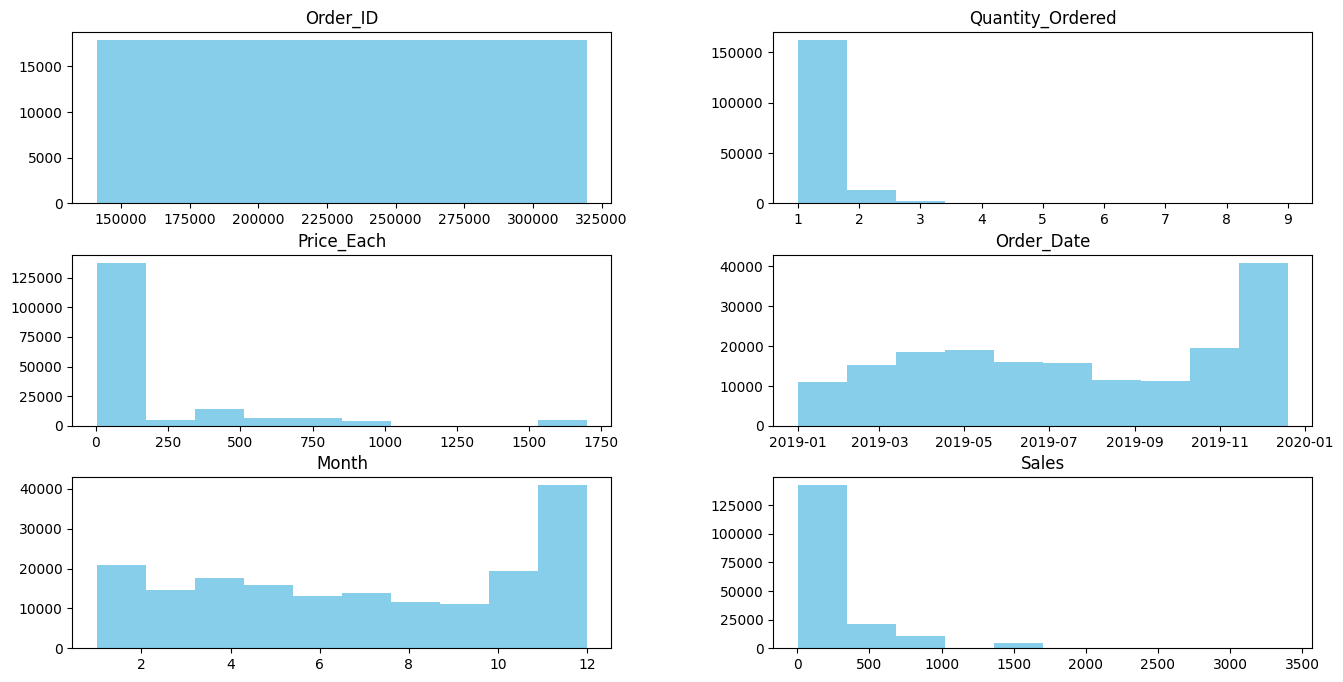

In [526]:
# visualizing the distribution of the numeric columns
df_unique.hist(figsize=(16,8),grid=False,color='skyblue')
plt.show()

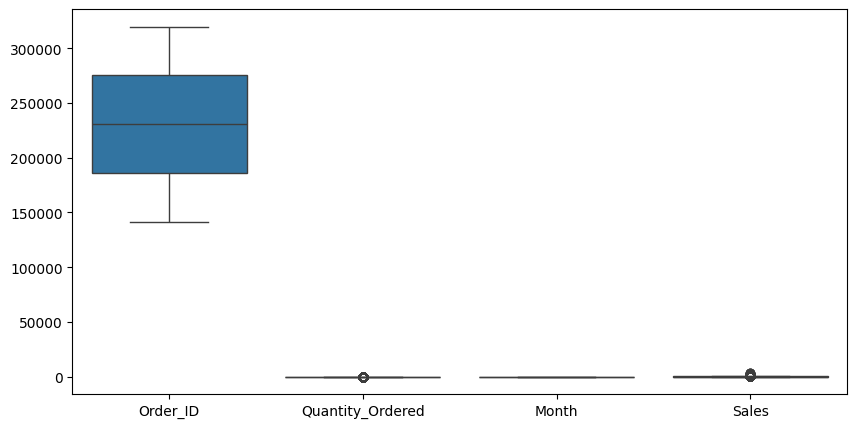

In [527]:
plt.figure(figsize=(10,5))
sns.boxplot(df_unique.drop(['Price_Each'],axis=1))
plt.show()

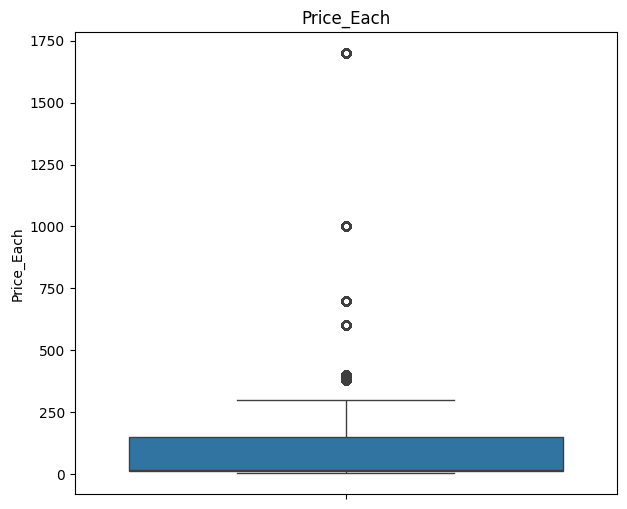

In [528]:
plt.figure(figsize=(7,6))
sns.boxplot(df_unique['Price_Each'])
plt.title('Price_Each')
plt.show()


Categorical Variable Visualizations.

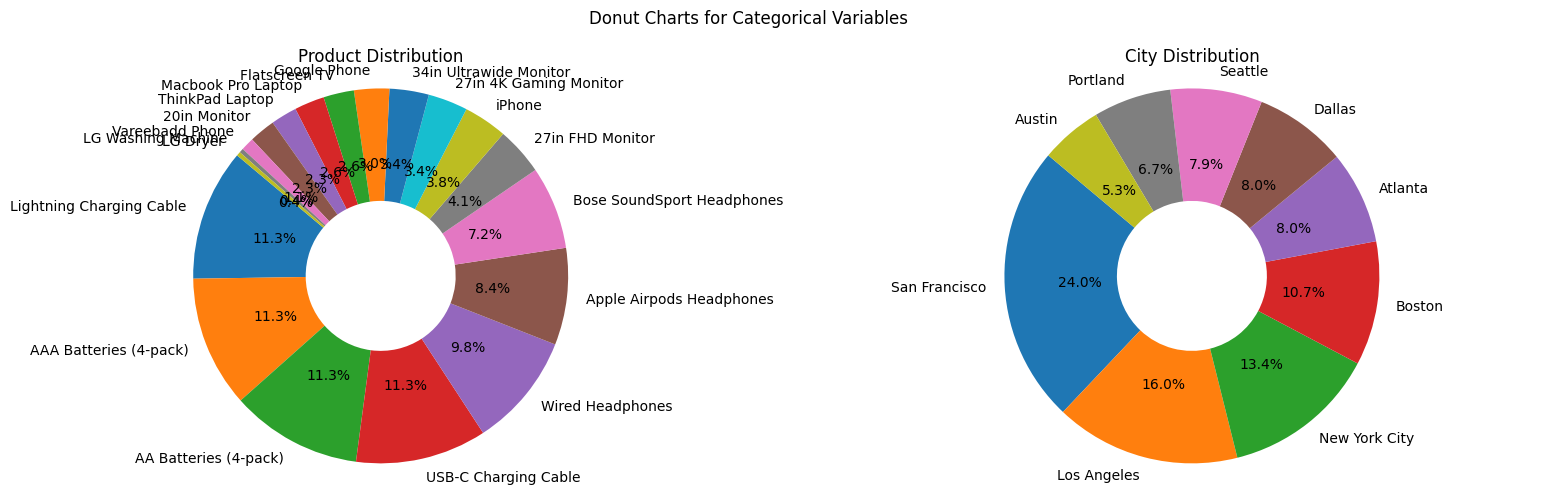

In [529]:
# Define the pairs or threes of categorical columns
cat_cols_pairs = [
    ('Product', 'City')
]

# Plotting donut charts for pairs or threes of categorical variables
for cols in cat_cols_pairs:
    fig, axs = plt.subplots(1, len(cols), figsize=(8 * len(cols), 5))
    fig.suptitle('Donut Charts for Categorical Variables', fontsize=12)
    
    for i, col in enumerate(cols):
        data = df_unique[col].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6))
        axs[i].set_title(f'{col} Distribution')
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()

- Bi-Variate Analysis

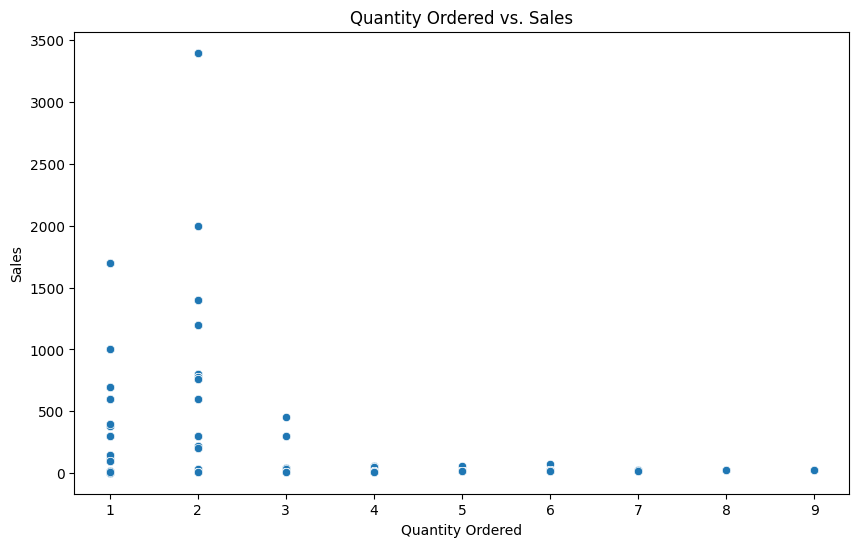

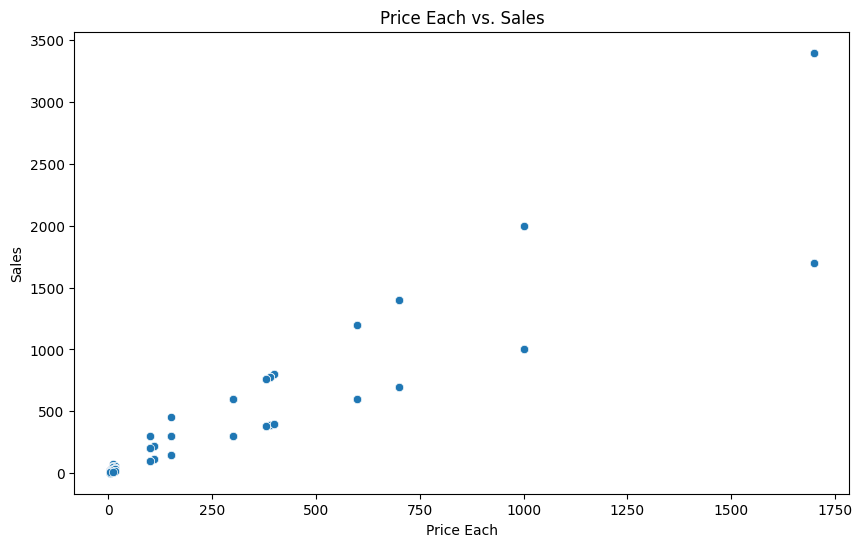

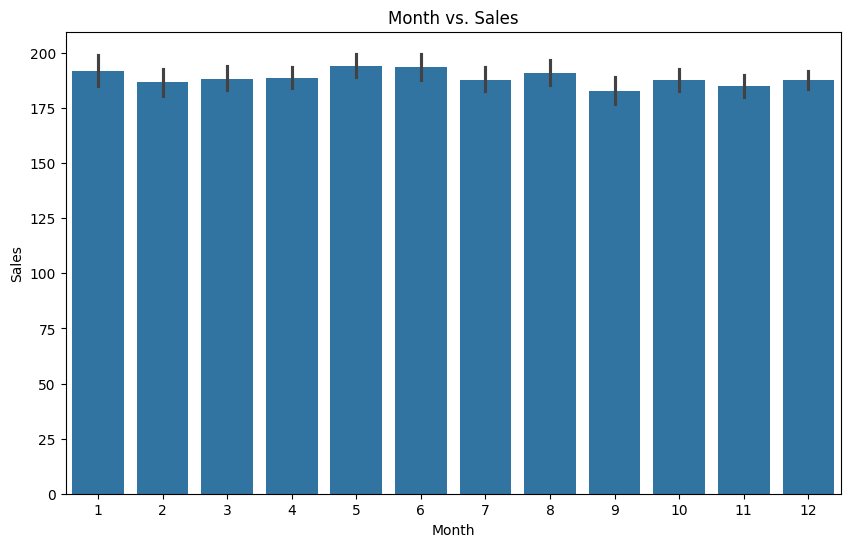

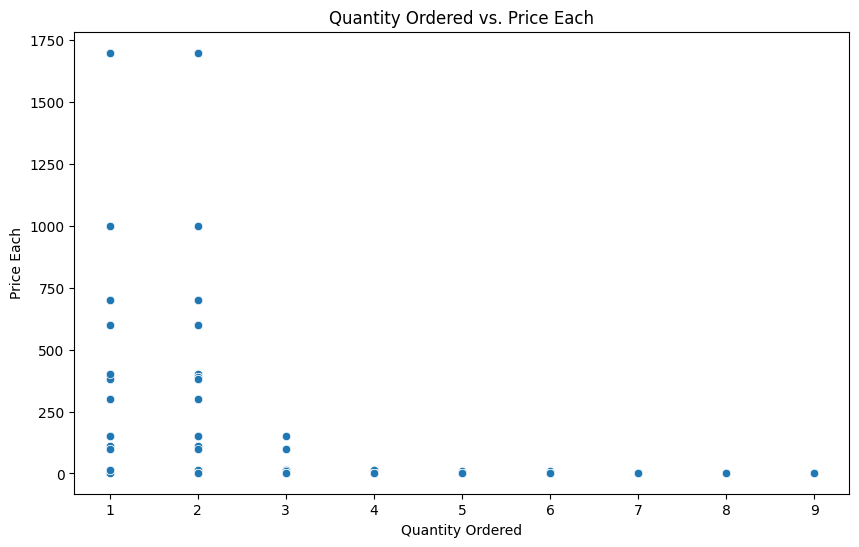

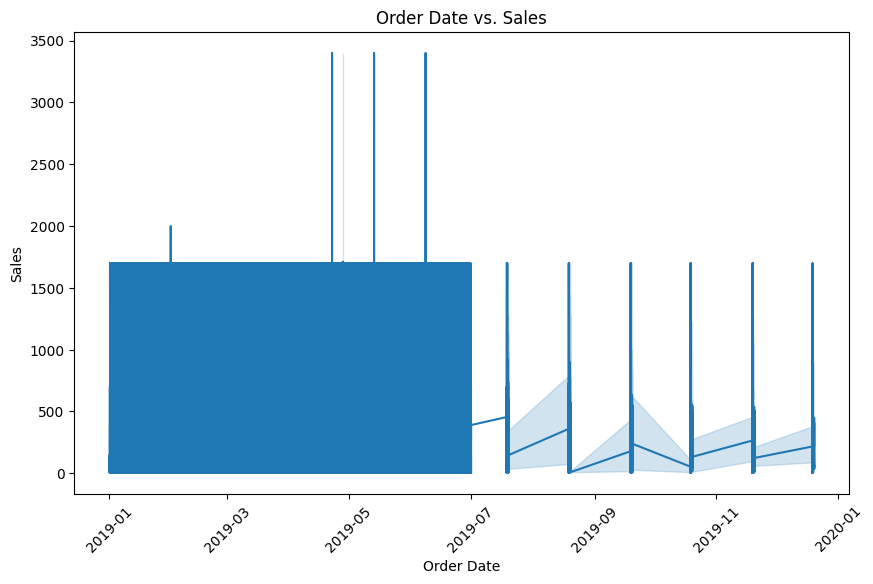

In [530]:

# Bivariate plot: Quantity Ordered vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity_Ordered', y='Sales', data=df_unique)
plt.title('Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

# Bivariate plot: Price Each vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_Each', y='Sales', data=df_unique)
plt.title('Price Each vs. Sales')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

# Bivariate plot: Month vs. Sales (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=df_unique)
plt.title('Month vs. Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Bivariate plot: Quantity Ordered vs. Price Each
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity_Ordered', y='Price_Each', data=df_unique)
plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.show()

# Bivariate plot: Order Date vs. Sales (Line plot for time series data)
plt.figure(figsize=(10, 6))
df_unique = df_unique.sort_values(by='Order_Date')  # Ensure data is sorted by date
sns.lineplot(x='Order_Date', y='Sales', data=df_unique)
plt.title('Order Date vs. Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [531]:
df_unique

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta
...,...,...,...,...,...,...,...,...,...
170854,304361,AA Batteries (4-pack),1,3.84,2019-12-19 23:58:00,"753 12th St, San Francisco, CA 94016",12,3.84,San Francisco
174682,308024,Lightning Charging Cable,1,14.95,2019-12-19 23:59:00,"615 6th St, Dallas, TX 75001",12,14.95,Dallas
173896,307267,USB-C Charging Cable,1,11.95,2019-12-19 23:59:00,"142 Maple St, Seattle, WA 98101",12,11.95,Seattle
185580,318448,20in Monitor,1,109.99,2019-12-19 23:59:00,"632 Park St, Portland, OR 97035",12,109.99,Portland


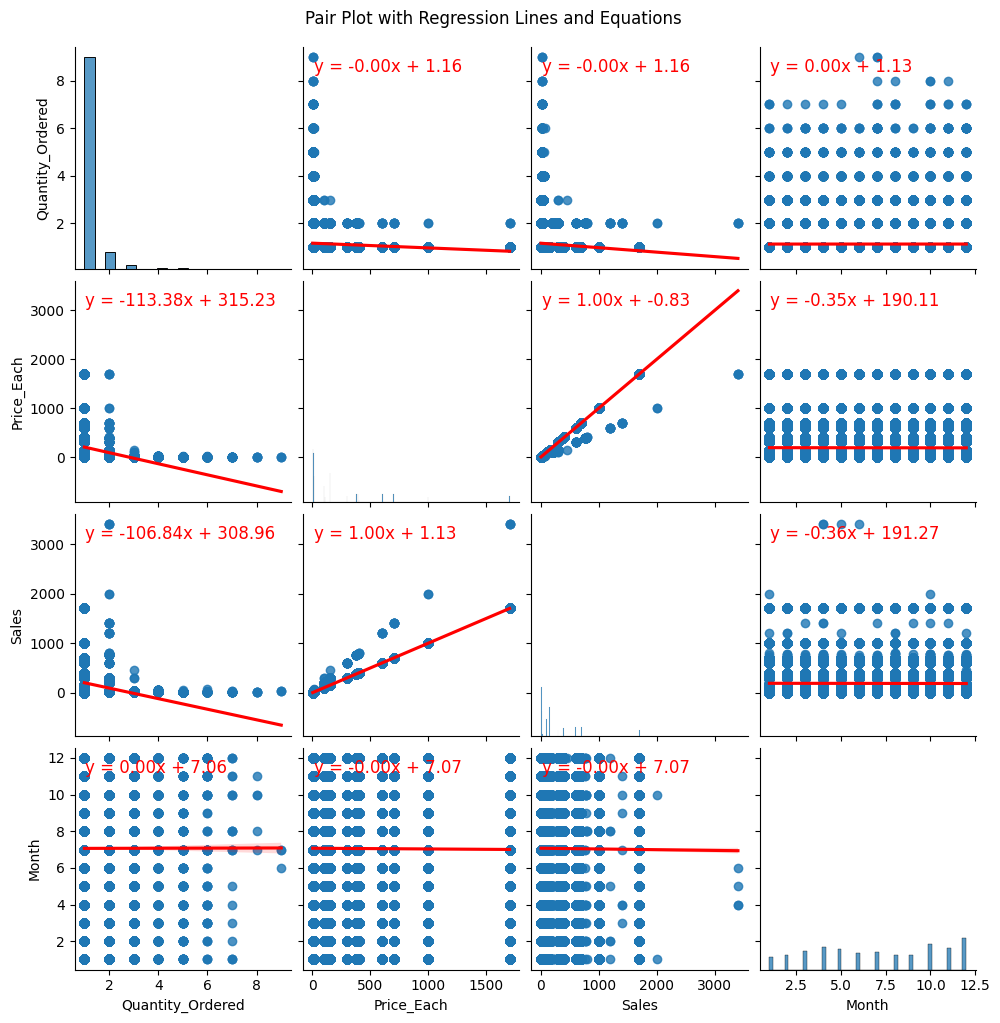

In [532]:
# Select only the numerical columns
numerical_columns = ['Quantity_Ordered', 'Price_Each', 'Sales', 'Month']

# Create pairplot
pairplot = sns.pairplot(df_unique[numerical_columns], kind='reg', plot_kws={'line_kws':{'color':'red'}})

# Add the regression equation to each subplot
for ax in pairplot.axes.flatten():
    if ax is not None:
        x_label = ax.get_xlabel()
        y_label = ax.get_ylabel()
        
        if x_label in numerical_columns and y_label in numerical_columns:
            # Get data
            X = df_unique[[x_label]].values
            Y = df_unique[y_label].values

            # Fit the linear regression model
            reg = LinearRegression().fit(X, Y)
            intercept = reg.intercept_
            slope = reg.coef_[0]

            # Calculate the equation of the regression line
            equation = f'y = {slope:.2f}x + {intercept:.2f}'

            # Display the equation on the plot
            ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')

# Add the overall title for the plot
plt.suptitle('Pair Plot with Regression Lines and Equations', y=1.02)

# Show the plot
plt.show()

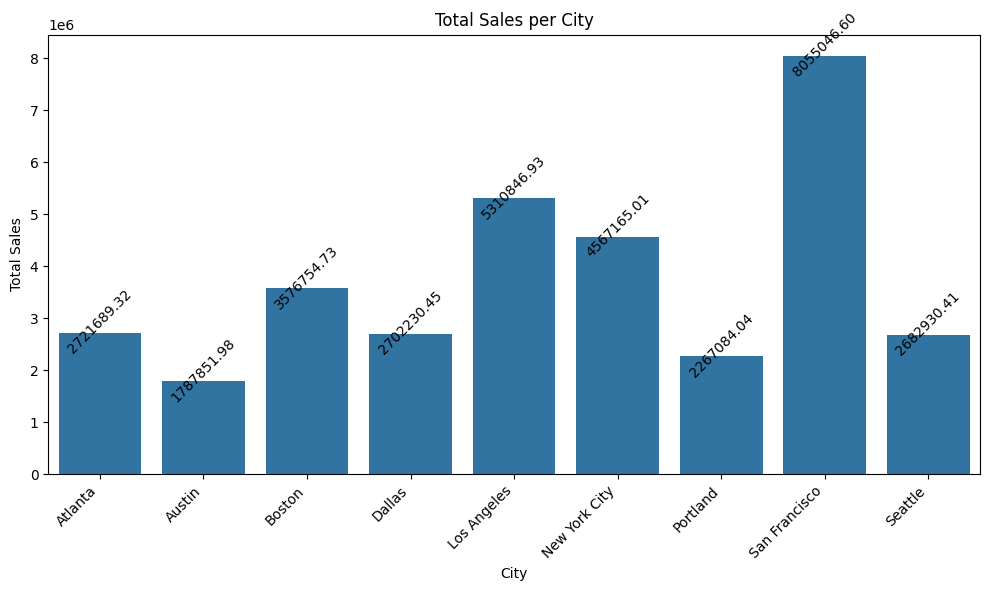

In [533]:

# Group the data by City and calculate the total sales per city
city_sales = df_unique.groupby('City')['Sales'].sum().reset_index()

# Function to add total sales values on top of bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', rotation=45)

# Plotting Total Sales per City
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=city_sales, x='City', y='Sales', estimator=sum)
plt.title('Total Sales per City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

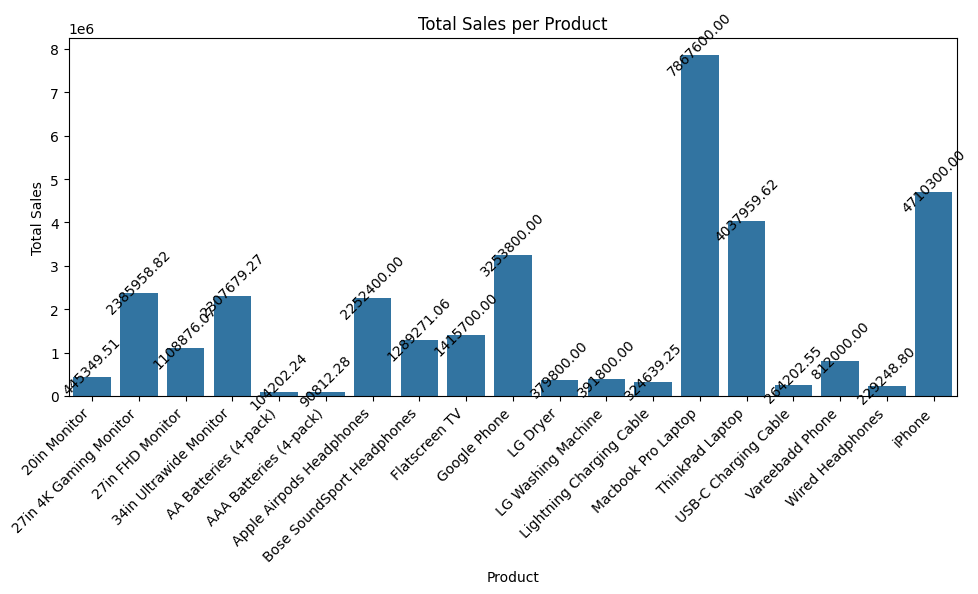

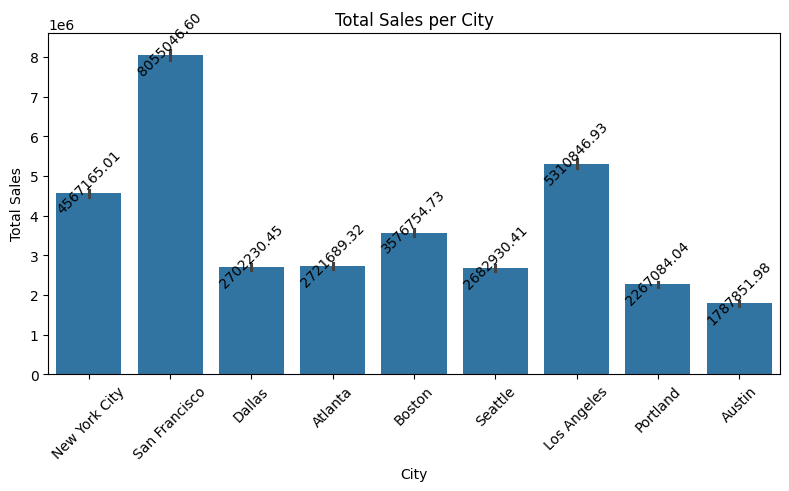

In [534]:
# Group the data by Product and calculate the total sales per product
product_sales = df_unique.groupby('Product')['Sales'].sum().reset_index()

# Function to add total sales values on top of bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', rotation=45)

# Plotting Total Sales per Product
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_sales, x='Product', y='Sales', estimator=sum)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

# Plotting Sales per City
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_unique, x='City', y='Sales', estimator=sum)
plt.title('Total Sales per City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

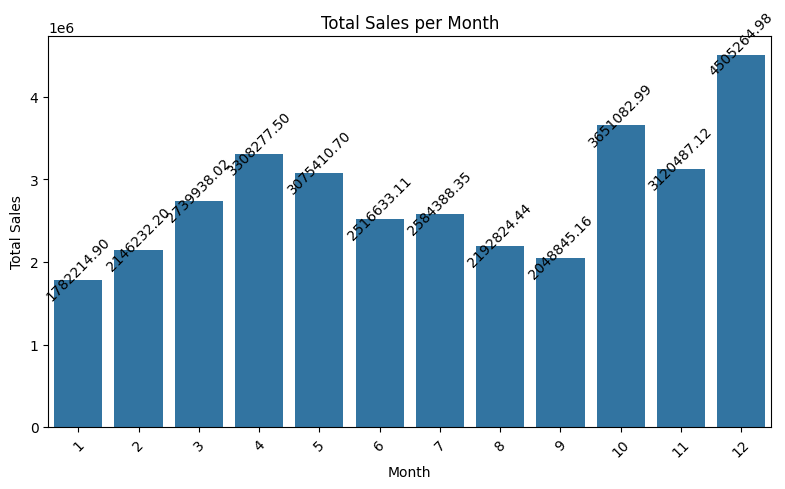

In [535]:
# Group the data by Month and calculate the total sales per month
monthly_sales = df_unique.groupby('Month')['Sales'].sum().reset_index()

# Function to add total sales values on top of bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', rotation=45)

# Plotting Total Sales per Month
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=monthly_sales, x='Month', y='Sales', estimator=sum)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

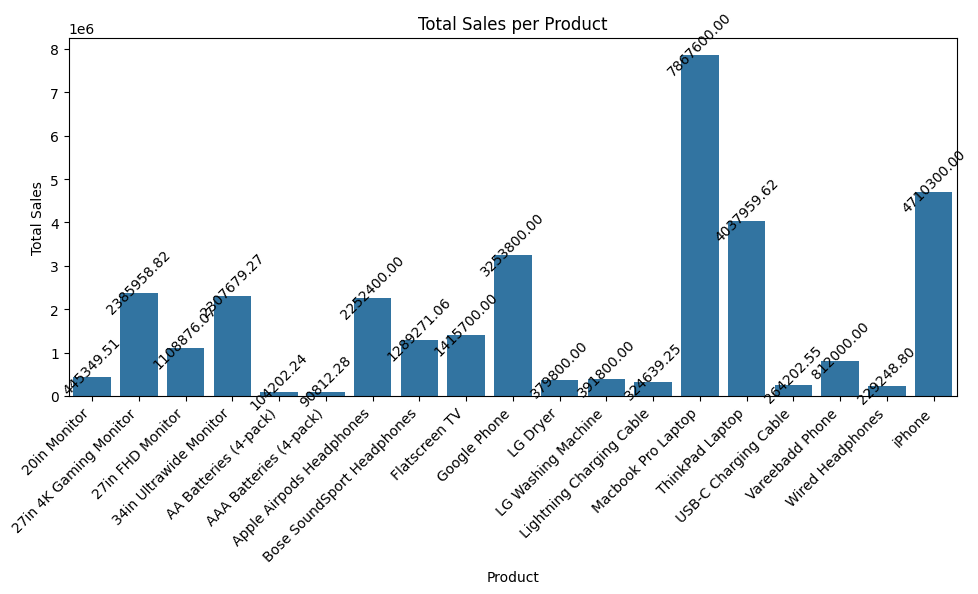

In [536]:


# Function to add total sales values on top of bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', rotation=45)

# Plotting Total Sales per Product
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_sales, x='Product', y='Sales', estimator=sum)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

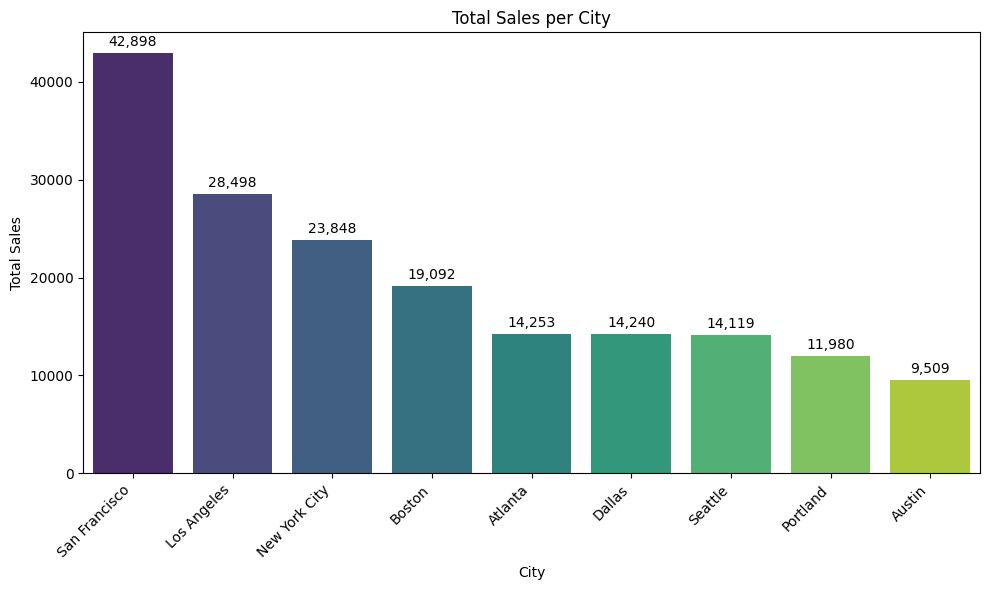

In [537]:

# Plotting Total Sales per City
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_city_sales, x='City', y='count', palette='viridis')
plt.title('Total Sales per City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Add total sales labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

In [538]:
df_unique

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta
...,...,...,...,...,...,...,...,...,...
170854,304361,AA Batteries (4-pack),1,3.84,2019-12-19 23:58:00,"753 12th St, San Francisco, CA 94016",12,3.84,San Francisco
174682,308024,Lightning Charging Cable,1,14.95,2019-12-19 23:59:00,"615 6th St, Dallas, TX 75001",12,14.95,Dallas
173896,307267,USB-C Charging Cable,1,11.95,2019-12-19 23:59:00,"142 Maple St, Seattle, WA 98101",12,11.95,Seattle
185580,318448,20in Monitor,1,109.99,2019-12-19 23:59:00,"632 Park St, Portland, OR 97035",12,109.99,Portland


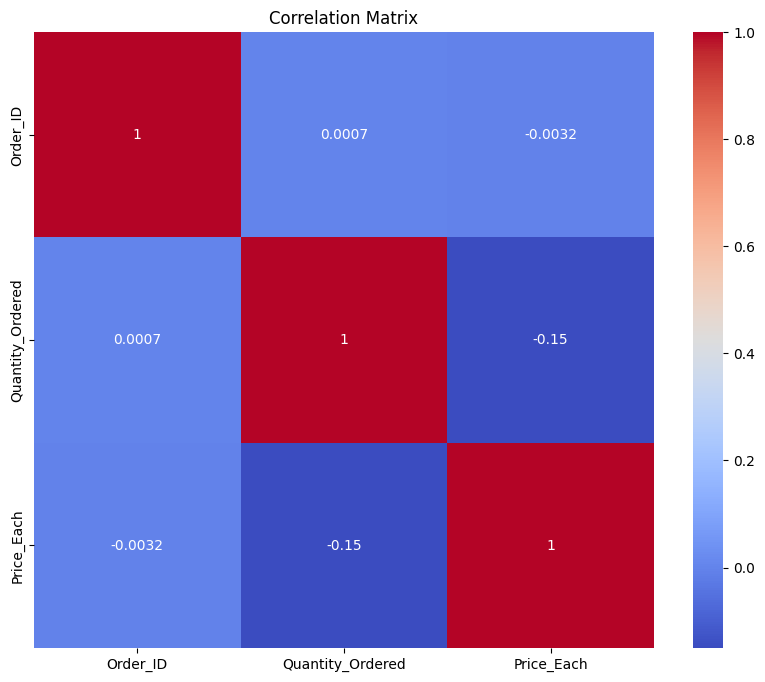

In [539]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=False)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-  Answering Key Business Questions

Key Business Questions:

1. How much revenue was generated in 2019?


In [540]:

# Total revenue is the sum of the 'Sales' column
total_revenue = df_unique['Sales'].sum()

print(f'Total revenue generated in 2019: ${total_revenue:.2f}')


Total revenue generated in 2019: $33671599.47


2. Are there any seasonal trends in the sales data?


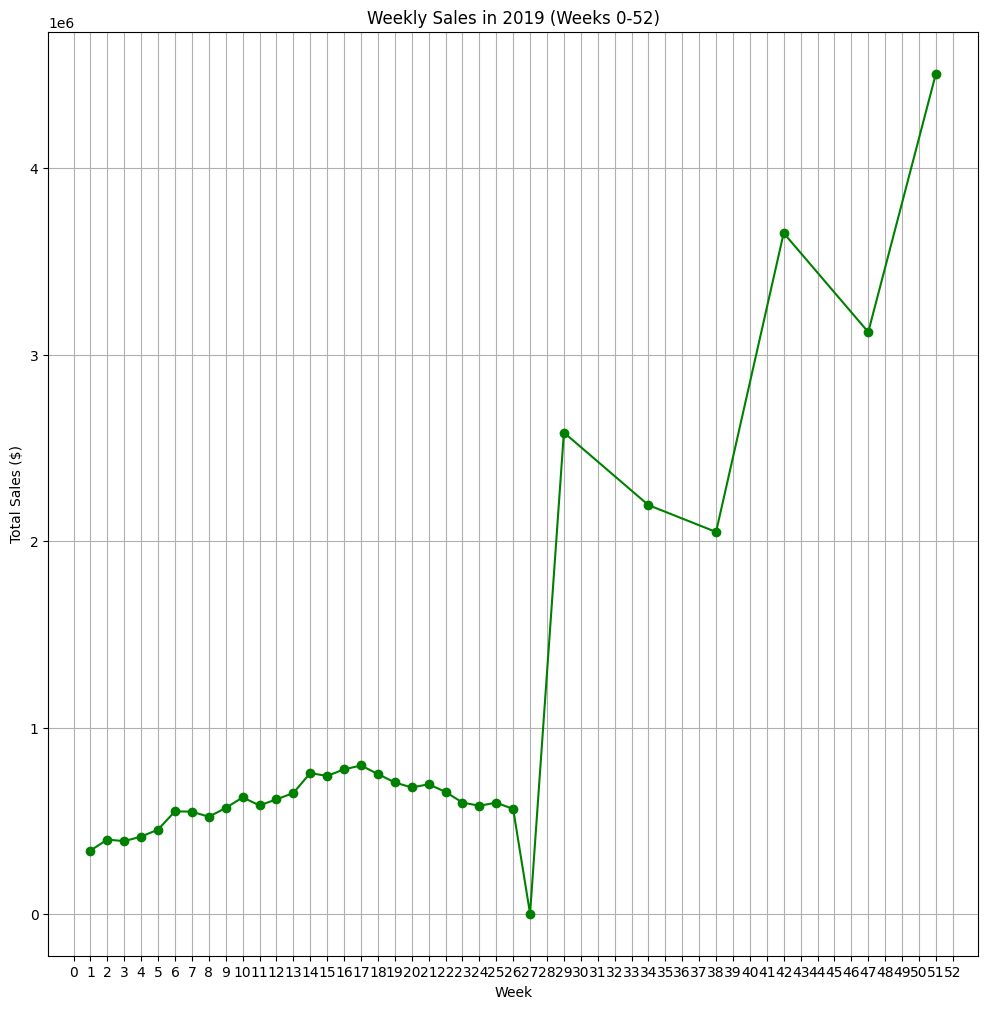

In [541]:
# Convert 'Order_Date' to datetime if it's not already in that format
df_unique['Order_Date'] = pd.to_datetime(df_unique['Order_Date'])

# Extract the week of the year from the 'Order_Date' column
df_unique['Week'] = df_unique['Order_Date'].dt.isocalendar().week

# Group by 'Week' and sum the 'Sales' for each week
weekly_sales = df_unique.groupby('Week')['Sales'].sum()

# Plotting the weekly sales
plt.figure(figsize=(12, 12))
weekly_sales.plot(kind='line', marker='o', color='green')
plt.title('Weekly Sales in 2019 (Weeks 0-52)', fontsize=12)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Total Sales ($)', fontsize=10)
plt.xticks(range(0, 53))  # Show week numbers from 0 to 52
plt.grid(True)
plt.show()

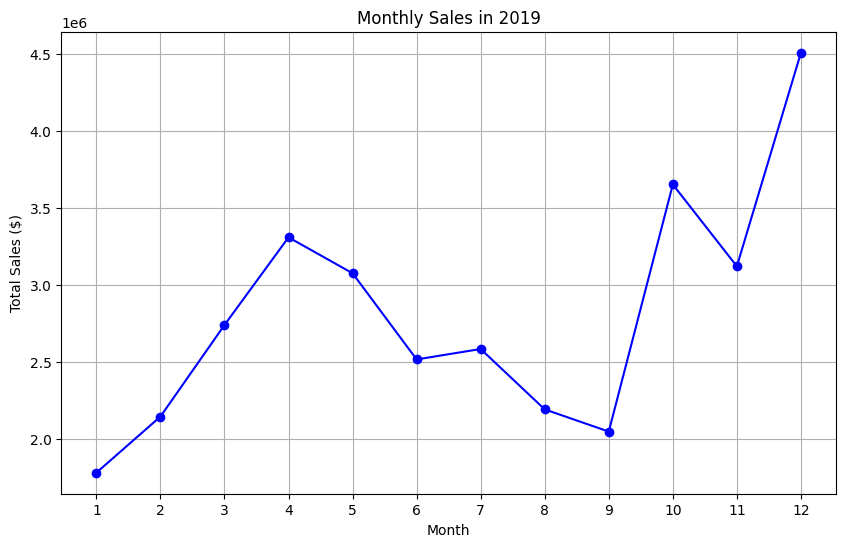

In [542]:
# Grouping sales by month
monthly_sales = df_unique.groupby('Month')['Sales'].sum()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

In [543]:
# To calculate and analyze quarterly sales in 2019, we can break the data into four quarters:
# Q1: January - March
# Q2: April - June
# Q3: July - September
# Q4: October - December

# Create a dictionary to map months to quarters
month_to_quarter = {
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}

# Map the 'Month' column to quarters
df_unique['Quarter'] = df_unique['Month'].map(month_to_quarter)

# Group by 'Quarter' and sum the 'Sales' for each quarter
quarterly_sales = df_unique.groupby('Quarter')['Sales'].sum()

# Display the total sales for each quarter
print(quarterly_sales)

Quarter
Q1     6668385.12
Q2     8900321.31
Q3     6826057.95
Q4    11276835.09
Name: Sales, dtype: float64


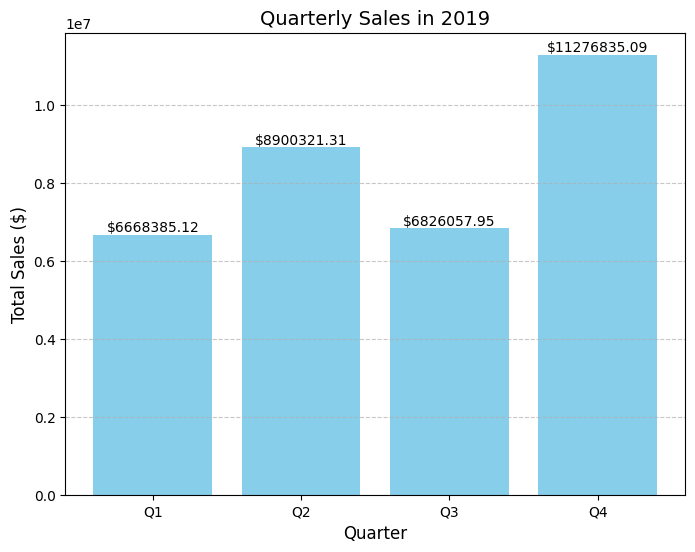

In [544]:

# Plotting the quarterly sales as a bar chart (histogram-like)
plt.figure(figsize=(8, 6))
bars = plt.bar(quarterly_sales.index, quarterly_sales.values, color='skyblue')

# Adding the sales amount on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:.2f}', ha='center', va='bottom')

# Adding titles and labels
plt.title('Quarterly Sales in 2019', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


3. Which products performed the best and worst?


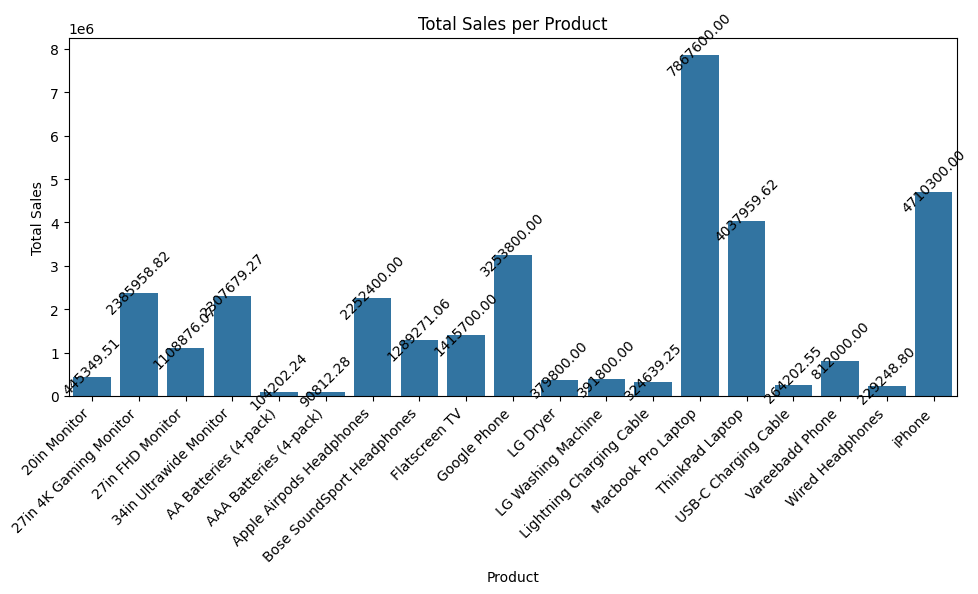

In [545]:

# Function to add total sales values on top of bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8), textcoords='offset points', rotation=45)

# Plotting Total Sales per Product
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_sales, x='Product', y='Sales', estimator=sum)
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
add_labels(ax)  # Add total sales labels on top of bars
plt.tight_layout()
plt.show()

In [546]:


# Group by 'Product' and sum the 'Sales' for each product
product_sales = df_unique.groupby('Product')['Sales'].sum()

# Sort products by total sales in descending order
product_sales_sorted = product_sales.sort_values(ascending=False)

# Best performing product (highest sales)
best_product = product_sales_sorted.idxmax()
best_sales = product_sales_sorted.max()

# Worst performing product (lowest sales)
worst_product = product_sales_sorted.idxmin()
worst_sales = product_sales_sorted.min()

# Display the results
print(f"Best Performing Product: {best_product} with total sales of ${best_sales:.2f}")
print(f"Worst Performing Product: {worst_product} with total sales of ${worst_sales:.2f}")


Best Performing Product: Macbook Pro Laptop with total sales of $7867600.00
Worst Performing Product: AAA Batteries (4-pack) with total sales of $90812.28


4. How do sales in different months and weeks compare?


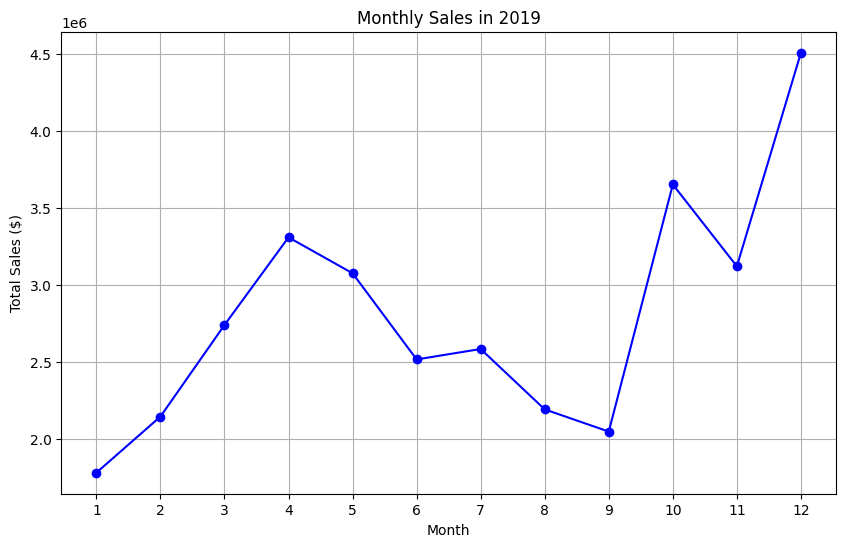

In [547]:
# Grouping sales by month
monthly_sales = df_unique.groupby('Month')['Sales'].sum()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

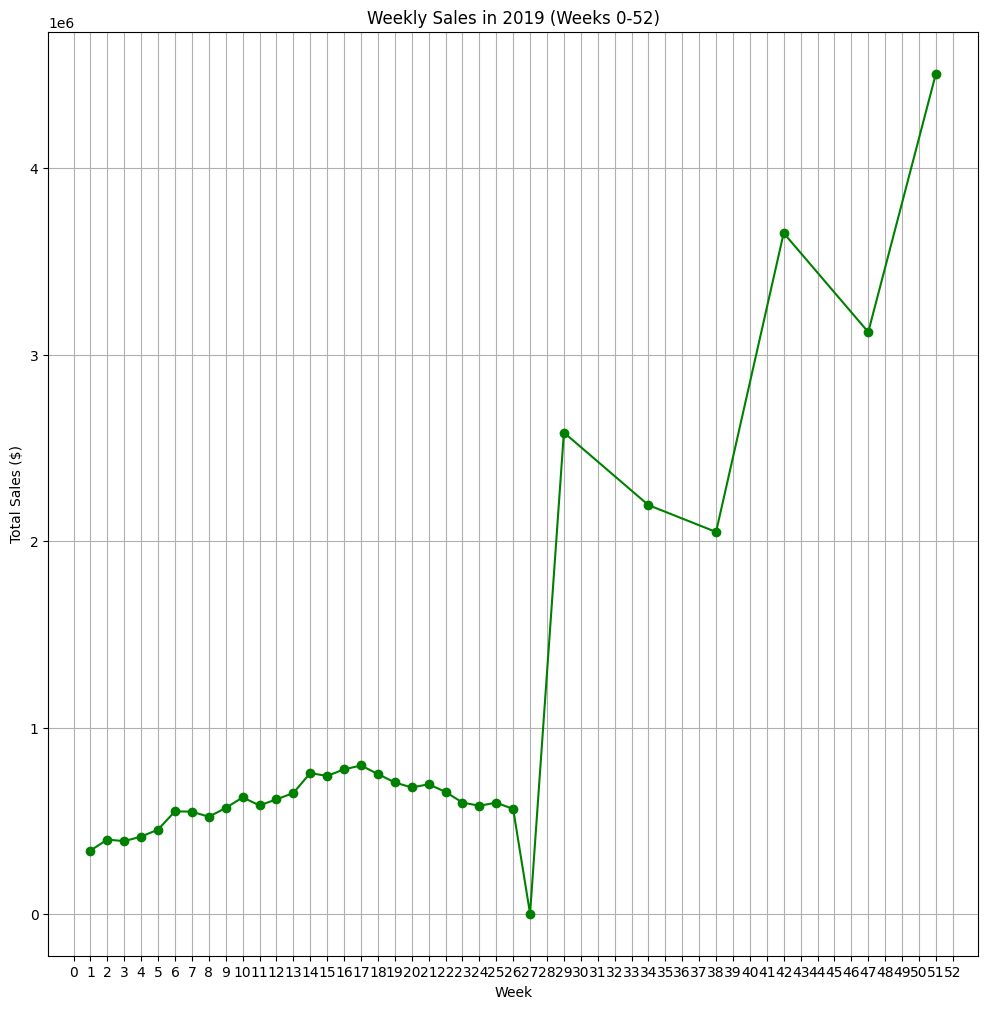

In [548]:
# Convert 'Order_Date' to datetime if it's not already in that format
df_unique['Order_Date'] = pd.to_datetime(df_unique['Order_Date'])

# Extract the week of the year from the 'Order_Date' column
df_unique['Week'] = df_unique['Order_Date'].dt.isocalendar().week

# Group by 'Week' and sum the 'Sales' for each week
weekly_sales = df_unique.groupby('Week')['Sales'].sum()

# Plotting the weekly sales
plt.figure(figsize=(12, 12))
weekly_sales.plot(kind='line', marker='o', color='green')
plt.title('Weekly Sales in 2019 (Weeks 0-52)', fontsize=12)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Total Sales ($)', fontsize=10)
plt.xticks(range(0, 53))  # Show week numbers from 0 to 52
plt.grid(True)
plt.show()

5. Which cities received the most product deliveries?


In [549]:
# Group by 'City' and count the number of orders (rows) for each city
city_deliveries = df_unique.groupby('City')['Order_ID'].count()

# Sort the cities by number of deliveries in descending order
city_deliveries_sorted = city_deliveries.sort_values(ascending=False)

# Display the top cities with the most deliveries
print(city_deliveries_sorted.head(10))  # Display top 10 cities

City
San Francisco    42898
Los Angeles      28498
New York City    23848
Boston           19092
Atlanta          14253
Dallas           14240
Seattle          14119
Portland         11980
Austin            9509
Name: Order_ID, dtype: int64


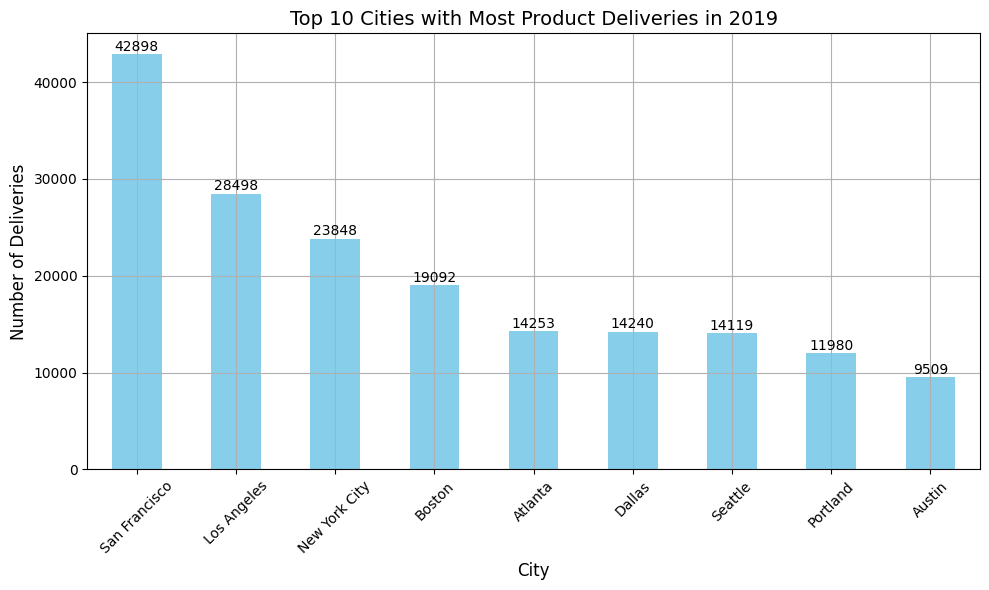

In [550]:
# Plot the number of deliveries by city
plt.figure(figsize=(10, 6))
bars = city_deliveries_sorted.head(10).plot(kind='bar', color='skyblue')

# Add the number of deliveries on top of each bar
for i, delivery in enumerate(city_deliveries_sorted.head(10).values):
    plt.text(i, delivery + 5, str(delivery), ha='center', va='bottom')

# Titles and labels
plt.title('Top 10 Cities with Most Product Deliveries in 2019', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

6. How do different product categories perform in terms of revenue and quantity sold?


In [551]:
# Group by 'Product' and calculate total 'Sales' and total 'Quantity_Ordered' for each product category
category_performance = df_unique.groupby('Product').agg(
    total_revenue=('Sales', 'sum'),
    total_quantity=('Quantity_Ordered', 'sum')
).reset_index()

# Sort the categories by revenue in descending order
category_performance_sorted = category_performance.sort_values(by='total_revenue', ascending=False)

# Display the top performing categories by revenue
print(category_performance_sorted.head(10))  # Display top 10 categories

                       Product  total_revenue  total_quantity
13          Macbook Pro Laptop     7867600.00            4628
18                      iPhone     4710300.00            6729
14             ThinkPad Laptop     4037959.62            4038
9                 Google Phone     3253800.00            5423
1       27in 4K Gaming Monitor     2385958.82            6118
3       34in Ultrawide Monitor     2307679.27            6073
6     Apple Airpods Headphones     2252400.00           15016
8                Flatscreen TV     1415700.00            4719
7   Bose SoundSport Headphones     1289271.06           12894
2             27in FHD Monitor     1108876.07            7393


In [552]:
# Group by 'Product' and calculate total 'Sales' and total 'Quantity_Ordered' for each product category
category_performance = df_unique.groupby('Product').agg(
    total_revenue=('Sales', 'sum'),
    total_quantity=('Quantity_Ordered', 'sum')
).reset_index()

# Sort the categories by revenue in descending order
category_performance_sorted = category_performance.sort_values(by='total_revenue', ascending=True)

# Display the top performing categories by revenue
print(category_performance_sorted.head(10))  # Display bottom 10 categories

                     Product  total_revenue  total_quantity
5     AAA Batteries (4-pack)       90812.28           30372
4      AA Batteries (4-pack)      104202.24           27136
17          Wired Headphones      229248.80           19120
15      USB-C Charging Cable      264202.55           22109
12  Lightning Charging Cable      324639.25           21715
10                  LG Dryer      379800.00             633
11        LG Washing Machine      391800.00             653
0               20in Monitor      445349.51            4049
16           Vareebadd Phone      812000.00            2030
2           27in FHD Monitor     1108876.07            7393


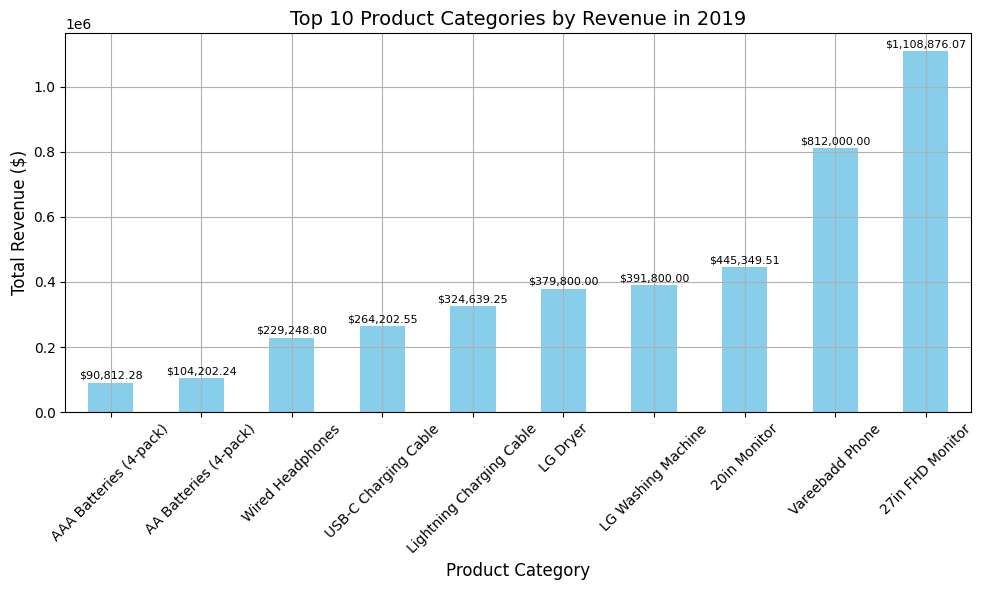

In [553]:
# Plot revenue by product category
plt.figure(figsize=(10, 6))
bars = category_performance_sorted.set_index('Product')['total_revenue'].head(10).plot(kind='bar', color='skyblue')

# Add the revenue values on top of each bar
for i, revenue in enumerate(category_performance_sorted['total_revenue'].head(10)):
    plt.text(i, revenue + 5000, f'${revenue:,.2f}', ha='center', va='bottom', fontsize=8)

# Add titles and labels
plt.title('Top 10 Product Categories by Revenue in 2019', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

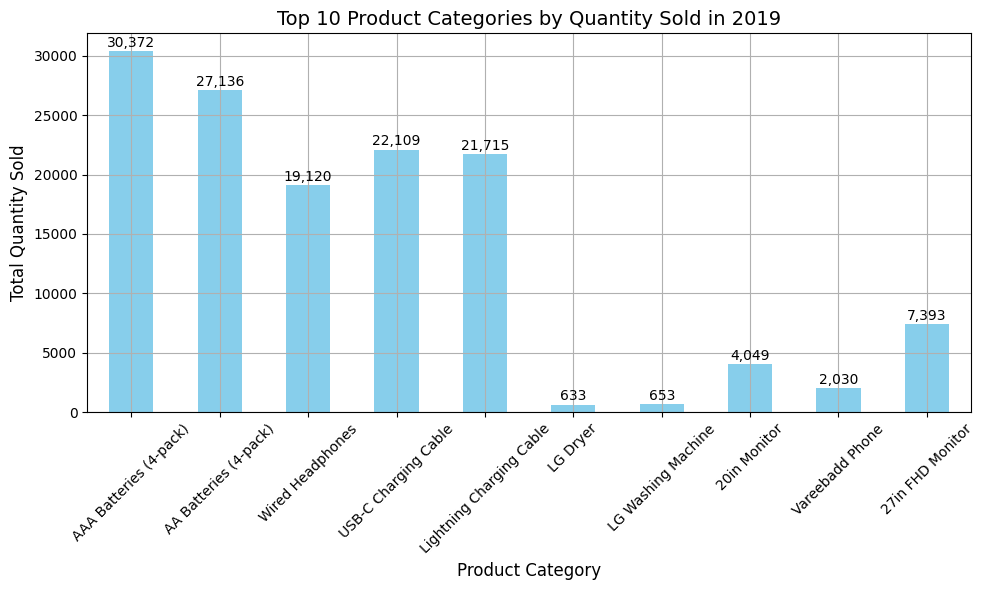

In [554]:
# Plot quantity sold by product category
plt.figure(figsize=(10, 6))
bars = category_performance_sorted.set_index('Product')['total_quantity'].head(10).plot(kind='bar', color='skyblue')

# Add the quantity sold values on top of each bar
for i, quantity in enumerate(category_performance_sorted['total_quantity'].head(10)):
    plt.text(i, quantity + 100, f'{quantity:,}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Top 10 Product Categories by Quantity Sold in 2019', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


                     Product  total_revenue  total_quantity
5     AAA Batteries (4-pack)       90812.28           30372
4      AA Batteries (4-pack)      104202.24           27136
17          Wired Headphones      229248.80           19120
15      USB-C Charging Cable      264202.55           22109
12  Lightning Charging Cable      324639.25           21715
10                  LG Dryer      379800.00             633
11        LG Washing Machine      391800.00             653
0               20in Monitor      445349.51            4049
16           Vareebadd Phone      812000.00            2030
2           27in FHD Monitor     1108876.07            7393


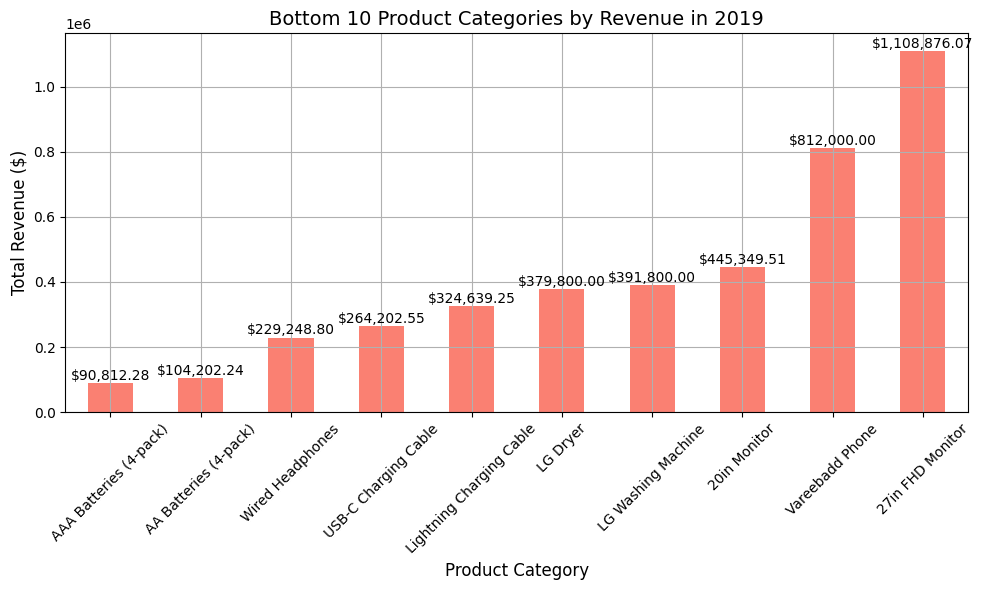

In [555]:
# Sort the categories by revenue in ascending order to get the bottom 10
category_performance_sorted = category_performance.sort_values(by='total_revenue', ascending=True)

# Display the bottom 10 categories by revenue
print(category_performance_sorted.head(10))

# Plot the revenue by product category for the bottom 10
plt.figure(figsize=(10, 6))
bars = category_performance_sorted.set_index('Product')['total_revenue'].head(10).plot(kind='bar', color='salmon')

# Add the revenue values on top of each bar
for i, revenue in enumerate(category_performance_sorted['total_revenue'].head(10)):
    plt.text(i, revenue + 100, f'${revenue:,.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Bottom 10 Product Categories by Revenue in 2019', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


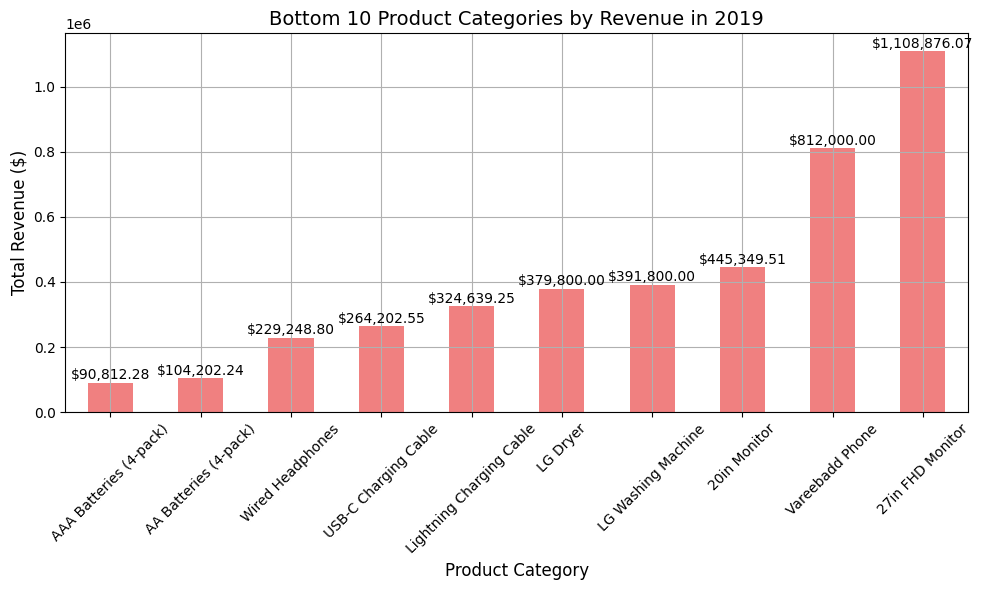

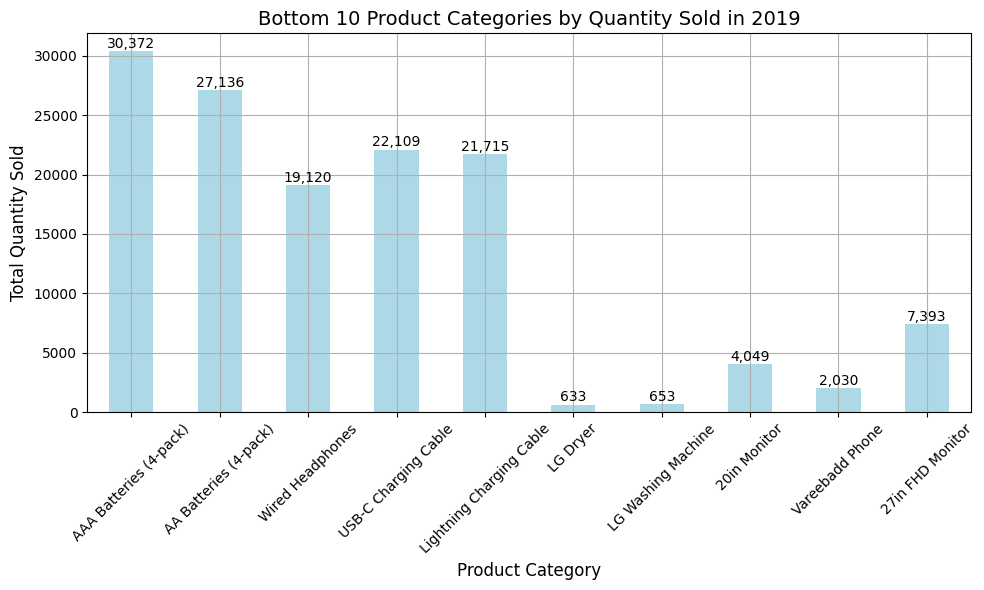

In [556]:

# Plot total revenue by product category (bottom 10)
plt.figure(figsize=(10, 6))
bars_revenue = category_performance_sorted.set_index('Product')['total_revenue'].head(10).plot(kind='bar', color='lightcoral')

# Add revenue values on top of each bar
for i, revenue in enumerate(category_performance_sorted['total_revenue'].head(10)):
    plt.text(i, revenue + 1000, f'${revenue:,.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels for the revenue plot
plt.title('Bottom 10 Product Categories by Revenue in 2019', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# Plot total quantity sold by product category (bottom 10)
plt.figure(figsize=(10, 6))
bars_quantity = category_performance_sorted.set_index('Product')['total_quantity'].head(10).plot(kind='bar', color='lightblue')

# Add quantity values on top of each bar
for i, quantity in enumerate(category_performance_sorted['total_quantity'].head(10)):
    plt.text(i, quantity + 10, f'{quantity:,}', ha='center', va='bottom', fontsize=10)

# Add titles and labels for the quantity plot
plt.title('Bottom 10 Product Categories by Quantity Sold in 2019', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


7. Identify additional insights to inform business strategies.

1. Top-selling Products by City:
Identifying the top products in different cities can help target marketing and inventory strategies

In [557]:
# Group by 'City' and 'Product', then calculate the total quantity ordered for each product in each city
city_product_performance = df_unique.groupby(['City', 'Product']).agg(
    total_quantity=('Quantity_Ordered', 'sum'),
    total_revenue=('Sales', 'sum')
).reset_index()

# Sort the results to find the top-selling product in each city
top_products_by_city = city_product_performance.sort_values(['City', 'total_quantity'], ascending=[True, False]).groupby('City').head(1)

# Display the top product for each city
print(top_products_by_city)



              City                 Product  total_quantity  total_revenue
5          Atlanta  AAA Batteries (4-pack)            2328        6960.72
24          Austin  AAA Batteries (4-pack)            1633        4882.67
43          Boston  AAA Batteries (4-pack)            3360       10046.40
62          Dallas  AAA Batteries (4-pack)            2455        7340.45
81     Los Angeles  AAA Batteries (4-pack)            4885       14606.15
100  New York City  AAA Batteries (4-pack)            4030       12049.70
119       Portland  AAA Batteries (4-pack)            2034        6081.66
138  San Francisco  AAA Batteries (4-pack)            7265       21722.35
157        Seattle  AAA Batteries (4-pack)            2382        7122.18


2. Peak Purchase Times:
Understanding when customers are most active can help optimize store hours, promotions, and staffing.

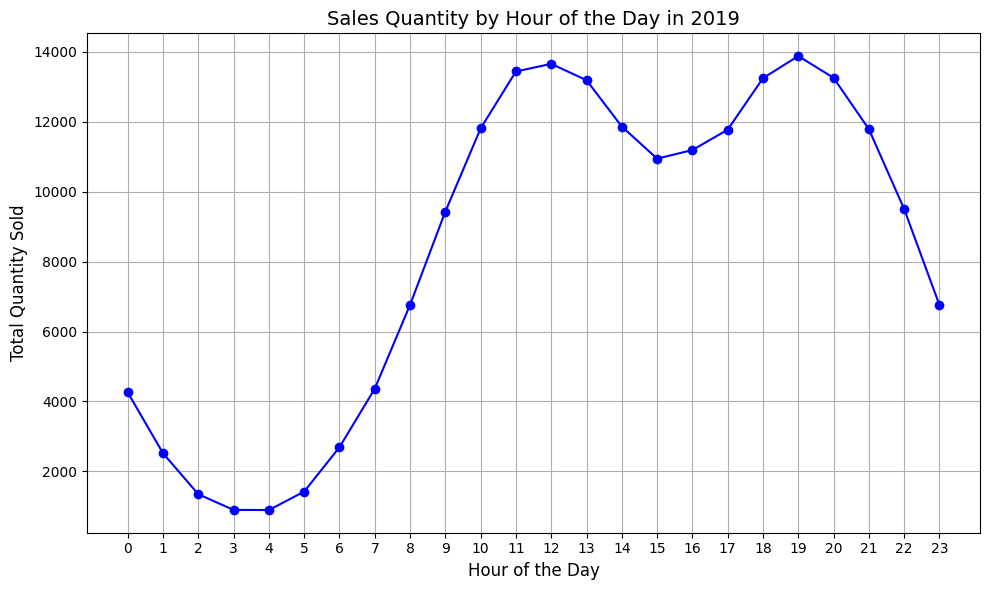

In [558]:
# Convert 'Order_Date' to datetime if not already done
df_unique['Order_Date'] = pd.to_datetime(df_unique['Order_Date'])

# Extract the hour of the day from 'Order_Date'
df_unique['Hour'] = df_unique['Order_Date'].dt.hour

# Group by the hour to see when the most sales occur
hourly_sales = df_unique.groupby('Hour').agg(
    total_quantity=('Quantity_Ordered', 'sum'),
    total_revenue=('Sales', 'sum')
).reset_index()

# Plot the sales by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['Hour'], hourly_sales['total_quantity'], marker='o', linestyle='-', color='blue')
plt.title('Sales Quantity by Hour of the Day in 2019', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()

plt.show()


3. Seasonal Sales Performance:
Analyzing sales by season can provide insights into the best times for product launches or promotion

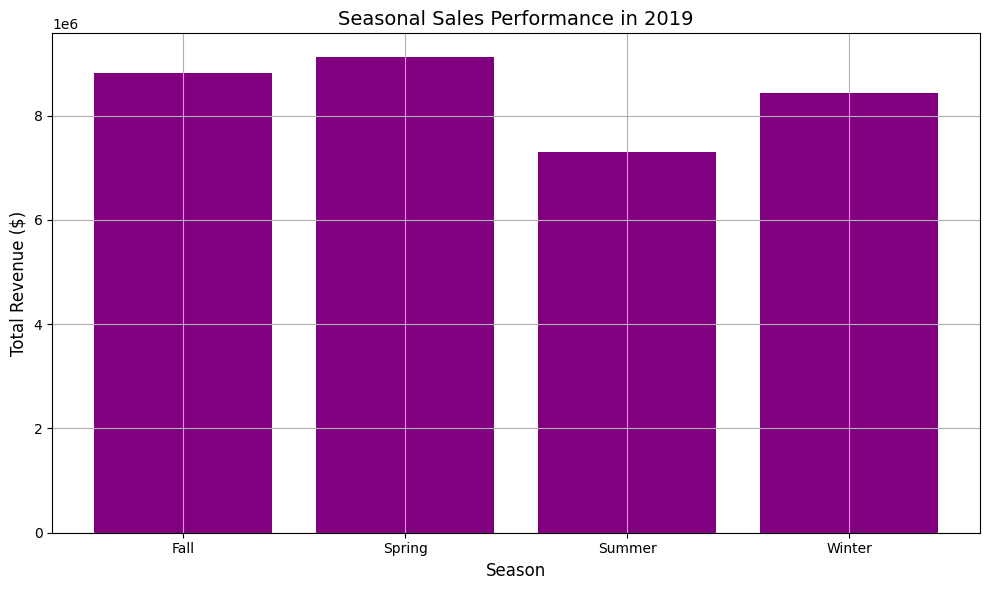

In [559]:
# Extract the month and map it to seasons
df_unique['Month'] = df_unique['Order_Date'].dt.month
df_unique['Season'] = df_unique['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                               'Spring' if x in [3, 4, 5] else
                                               'Summer' if x in [6, 7, 8] else
                                               'Fall')

# Group by season to find total sales and quantity sold
seasonal_sales = df_unique.groupby('Season').agg(
    total_quantity=('Quantity_Ordered', 'sum'),
    total_revenue=('Sales', 'sum')
).reset_index()

# Plot seasonal performance
plt.figure(figsize=(10, 6))
plt.bar(seasonal_sales['Season'], seasonal_sales['total_revenue'], color='purple')
plt.title('Seasonal Sales Performance in 2019', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


- 4 Cross-Selling Opportunities:
Identifying commonly purchased product combinations can provide opportunities for cross-selling.

In [560]:
# Find commonly purchased product combinations
cross_selling = df_unique.groupby('Order_ID')['Product'].apply(lambda x: ','.join(x)).reset_index()

# Split product combinations into separate rows and count occurrences
from collections import Counter
combinations = Counter(",".join(cross_selling['Product'].values).split(','))

# Display the most common product combinations
print(combinations.most_common(10))
combinations


[('Lightning Charging Cable', 20252), ('AAA Batteries (4-pack)', 20223), ('AA Batteries (4-pack)', 20205), ('USB-C Charging Cable', 20174), ('Wired Headphones', 17560), ('Apple Airpods Headphones', 14910), ('Bose SoundSport Headphones', 12767), ('27in FHD Monitor', 7352), ('iPhone', 6722), ('27in 4K Gaming Monitor', 6104)]


Counter({'Lightning Charging Cable': 20252,
         'AAA Batteries (4-pack)': 20223,
         'AA Batteries (4-pack)': 20205,
         'USB-C Charging Cable': 20174,
         'Wired Headphones': 17560,
         'Apple Airpods Headphones': 14910,
         'Bose SoundSport Headphones': 12767,
         '27in FHD Monitor': 7352,
         'iPhone': 6722,
         '27in 4K Gaming Monitor': 6104,
         '34in Ultrawide Monitor': 6056,
         'Google Phone': 5416,
         'Flatscreen TV': 4701,
         'Macbook Pro Laptop': 4624,
         'ThinkPad Laptop': 4036,
         '20in Monitor': 4022,
         'Vareebadd Phone': 2027,
         'LG Washing Machine': 653,
         'LG Dryer': 633})

In [561]:
# Display the unique columns in the DataFrame
unique_columns = df_unique.columns
print("Unique Columns in df_unique:")
print(unique_columns)


Unique Columns in df_unique:
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'Month', 'Sales', 'City', 'Week', 'Quarter', 'Hour',
       'Season'],
      dtype='object')


In [562]:
df_unique

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Week,Quarter,Hour,Season
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,11.99,New York City,1,Q1,3,Winter
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,11.95,San Francisco,1,Q1,3,Winter
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,150.00,New York City,1,Q1,4,Winter
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2.99,Dallas,1,Q1,5,Winter
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,23.90,Atlanta,1,Q1,6,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170854,304361,AA Batteries (4-pack),1,3.84,2019-12-19 23:58:00,"753 12th St, San Francisco, CA 94016",12,3.84,San Francisco,51,Q4,23,Winter
174682,308024,Lightning Charging Cable,1,14.95,2019-12-19 23:59:00,"615 6th St, Dallas, TX 75001",12,14.95,Dallas,51,Q4,23,Winter
173896,307267,USB-C Charging Cable,1,11.95,2019-12-19 23:59:00,"142 Maple St, Seattle, WA 98101",12,11.95,Seattle,51,Q4,23,Winter
185580,318448,20in Monitor,1,109.99,2019-12-19 23:59:00,"632 Park St, Portland, OR 97035",12,109.99,Portland,51,Q4,23,Winter
